In [359]:
import numpy as np
from PIL import Image
from numpy import load
import matplotlib.pyplot as plt
import os

In [360]:
#file = open("file.compressed", "w")
original_image = Image.open("landscape.bmp")
original_image_size = os.path.getsize('landscape.bmp')

#The compressed file will be 1/N as big as the original
N = 3; 

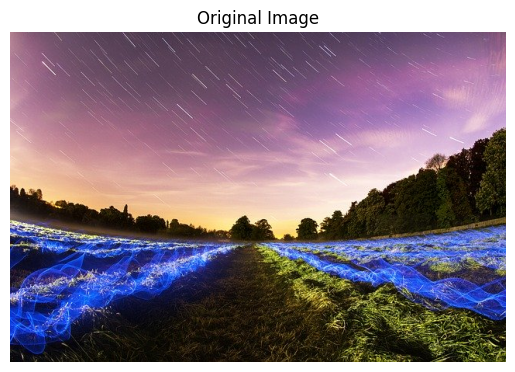

In [361]:
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [362]:
gray_image = original_image.convert('L')

In [363]:
image_array = np.array(gray_image)
height, width = image_array.shape

In [364]:
# Get SVD
U, S, V = np.linalg.svd(image_array, full_matrices=False) 

In [365]:
k = 100

def compress(k, U, S, V):
    U_truncated = U[:, :k]

    S_truncated = np.diag(S[:k])
    # We only need to store the diagonal since we know that the other 
    # elements are zeros
    S_diagnal = S_truncated.diagonal() 

    V_truncated = V[:k, :]

    np.savez('compressed.npz', U=U_truncated, S=S_diagnal, V=V_truncated, k=[k])

compress(k, U, S, V)


while((original_image_size/(os.path.getsize('compressed.npz'))) <= N):
    k -= 1
    compress(k, U, S, V)


intermediate_representation = np.load('compressed.npz')
U_mat = intermediate_representation['U']
S_diag = intermediate_representation['S']
k = intermediate_representation['k'][0]
S_mat = np.zeros((k,k))
for i in range(0, len(S_diag)):
    S_mat[i][i] = S_diag[i]


V_mat = intermediate_representation['V']


In [366]:
compressed_image = U_mat @ S_mat @ V_mat

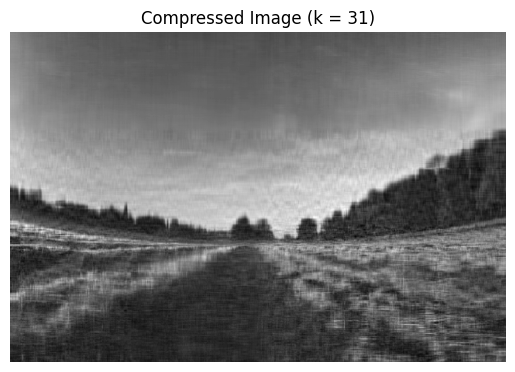

In [367]:
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image (k = {})".format(k))

#approx_img = Image.fromarray(reconstructed_image.astype('uint8'))
#approx_img.save('approximated_image.bmp')

plt.axis('off')
plt.show()